# Logistic Regression (Normalized Data)

### Importing essential libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn as sk
import regex as re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Importing Datasets (Tomek links, SMOTETOMEK, SMOTEENN)

In [2]:
#import data 
tomek_data = pd.read_csv("Data/tomek_data.csv", index_col=0) 
tomek_data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,6,1,170.0,70.0,24.0,1.0,2,2,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,0.0,1
1,6,1,180.0,113.0,35.0,2.0,2,1,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
2,4,1,183.0,68.0,20.0,2.0,4,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1,0.0,1
3,5,2,163.0,92.0,35.0,1.0,2,2,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1,0.0,1
4,1,1,173.0,68.0,23.0,5.0,5,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1


In [3]:
tomek_data.describe()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,...,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000,261523.000000
mean,4.297435,0.814143,170.180202,81.295095,27.943630,2.252303,3.875483,3.030808,2.392164,3.361662,...,0.032330,0.173698,0.026812,0.087048,0.306245,1.414698,0.609400,0.784753,0.022904,0.927482
std,1.570202,0.711858,10.595742,20.013723,6.043174,1.659767,1.398213,0.941894,1.022909,7.800001,...,0.176875,0.378850,0.161534,0.281906,0.460933,0.848627,0.487886,0.410994,0.149599,0.259343
min,1.000000,0.000000,91.000000,27.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,163.000000,68.000000,24.000000,1.000000,3.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,5.000000,1.000000,170.000000,79.000000,27.000000,1.000000,5.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,178.000000,91.000000,31.000000,3.000000,5.000000,4.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,9.000000,241.000000,294.000000,100.000000,6.000000,5.000000,4.000000,5.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#import data 
smoteenn_data = pd.read_csv("Data/smoteenn_data.csv", index_col=0) 
smoteenn_data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,6,1,170.0,70.0,24.0,1.0,2,2,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,0.0,1
1,4,1,183.0,68.0,20.0,2.0,4,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1,0.0,1
2,5,2,163.0,92.0,35.0,1.0,2,2,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1,0.0,1
3,1,1,173.0,68.0,23.0,5.0,5,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1
4,6,0,157.0,61.0,25.0,3.0,2,3,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0.0,1


In [5]:
smoteenn_data.describe()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,...,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000,439774.000000
mean,4.724270,0.769047,170.542058,82.189011,28.129481,2.120219,3.569174,2.803886,2.732740,5.128863,...,0.082179,0.188746,0.051668,0.121806,0.417065,1.289625,0.671426,0.655271,0.028732,0.917635
std,1.413031,0.638319,10.509787,19.851251,5.945000,1.457411,1.467692,0.967777,1.079877,9.709135,...,0.239817,0.364871,0.192734,0.292453,0.457988,0.701023,0.438302,0.475280,0.148568,0.274920
min,1.000000,0.000000,91.000000,27.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,163.000000,68.000000,24.000000,1.000000,2.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.040461,0.000000,0.000000,1.000000
50%,5.000000,1.000000,170.000000,80.000000,27.000000,1.340262,4.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.085534,1.000000,1.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,178.000000,93.000000,31.000000,3.000000,5.000000,4.000000,3.343098,4.083749,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,9.000000,236.000000,283.000000,100.000000,6.000000,5.000000,4.000000,5.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#import data 
smotetomek_data = pd.read_csv("Data/smotetomek_data.csv", index_col=0) 
smotetomek_data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,6,1,170.0,70.0,24.0,1.0,2,2,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,0.0,1
1,6,1,180.0,113.0,35.0,2.0,2,1,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
2,4,1,183.0,68.0,20.0,2.0,4,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1,0.0,1
3,5,2,163.0,92.0,35.0,1.0,2,2,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1,0.0,1
4,1,1,173.0,68.0,23.0,5.0,5,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1


In [7]:
smotetomek_data.describe()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,...,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000,492286.000000
mean,4.754992,0.776199,170.456211,82.354108,28.214981,2.129220,3.546447,2.803951,2.756451,5.411603,...,0.078905,0.194938,0.050838,0.123349,0.424899,1.288286,0.672564,0.657770,0.029239,0.919187
std,1.395306,0.647697,10.558079,20.157043,6.061611,1.456630,1.471187,0.966822,1.078271,9.896230,...,0.237984,0.372843,0.194012,0.298248,0.463126,0.701209,0.441243,0.474457,0.152182,0.272548
min,1.000000,0.000000,91.000000,27.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,163.000000,68.000000,24.000000,1.000000,2.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,1.000000,170.000000,80.467686,27.000000,1.383192,4.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.080778,1.000000,1.000000,1.000000,0.000000,1.000000
75%,6.000000,1.000000,178.000000,93.000000,31.000000,3.000000,5.000000,4.000000,3.388537,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,9.000000,241.000000,294.000000,100.000000,6.000000,5.000000,4.000000,5.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
tomek_data      = tomek_data.rename(columns = {'Coronary Heart Disease/Myocardial Infarction':'CHD/MI'})
smotetomek_data = smotetomek_data.rename(columns = {'Coronary Heart Disease/Myocardial Infarction':'CHD/MI'})
smoteenn_data   = smoteenn_data.rename(columns = {'Coronary Heart Disease/Myocardial Infarction':'CHD/MI'})

### Import test data

In [9]:
test_data = pd.read_csv('Data/test.csv', index_col=0)
test_data = test_data.rename(columns = {'Coronary Heart Disease/Myocardial Infarction':'CHD/MI'})
# Setting up test data for model evaluation
x_test = test_data.drop('CHD/MI', axis = 1)
y_test = test_data['CHD/MI']

### Fitting model with tomek_data

In [10]:
tomek_train_x = tomek_data.drop('CHD/MI', axis=1)
tomek_train_y = tomek_data["CHD/MI"]

In [11]:
#Traning data
logisticRegr = LogisticRegression(max_iter = 2000)

logisticRegr.fit(tomek_train_x, tomek_train_y)

LogisticRegression(max_iter=2000)

In [12]:
tomek_pred_y = logisticRegr.predict(x_test)

<AxesSubplot:>

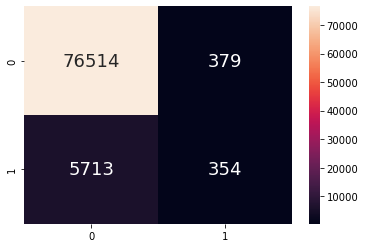

In [13]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, tomek_pred_y)
sns.heatmap(cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

In [14]:
#Evaluation
print("Metrics for Predicted data")
tp = cm[1][1] # True Positives : Good (1) predicted Good (1)
fp = cm[0][1] # False Positives : Bad (0) predicted Good (1)
tn = cm[0][0] # True Negatives : Bad (0) predicted Bad (0)
fn = cm[1][0] # False Negatives : Good (1) predicted Bad (0)


print("True Positive Rate: {x}%".format(x=round(100*tp/(tp+fn), 2)))
print("True Negative Rate: {x}%".format(x=round(100*tn/(tn+fp), 2)))
print("False Positive Rate: {x}%".format(x=round(100*fp/(tn+fp), 2)))
print("False Negative Rate: {x}%\n".format(x=round(100*fn/(tp+fn), 2)))

Metrics for Predicted data
True Positive Rate: 5.83%
True Negative Rate: 99.51%
False Positive Rate: 0.49%
False Negative Rate: 94.17%



In [15]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, tomek_pred_y)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 92.65670202507232


In [16]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, tomek_pred_y))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     76893
         1.0       0.48      0.06      0.10      6067

    accuracy                           0.93     82960
   macro avg       0.71      0.53      0.53     82960
weighted avg       0.90      0.93      0.90     82960



AUC - ROC Curve


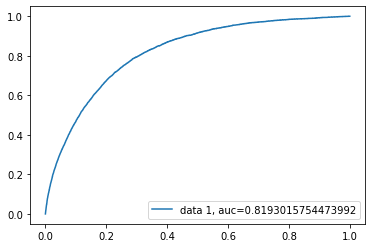

In [17]:
#AUC - ROC Curve
print("AUC - ROC Curve")
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Fitting model with smoteenn_data

In [18]:
smoteenn_train_x = smoteenn_data.drop('CHD/MI', axis=1)
smoteenn_train_y = smoteenn_data["CHD/MI"]

In [19]:
#Traning data
logisticRegr = LogisticRegression(max_iter = 2000)

logisticRegr.fit(smoteenn_train_x, smoteenn_train_y)

LogisticRegression(max_iter=2000)

In [20]:
smoteenn_pred_y = logisticRegr.predict(x_test)

<AxesSubplot:>

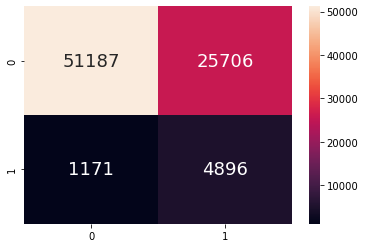

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, smoteenn_pred_y)
sns.heatmap(cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

In [22]:
#Evaluation
print("Metrics for Predicted data")
tp = cm[1][1] # True Positives : Good (1) predicted Good (1)
fp = cm[0][1] # False Positives : Bad (0) predicted Good (1)
tn = cm[0][0] # True Negatives : Bad (0) predicted Bad (0)
fn = cm[1][0] # False Negatives : Good (1) predicted Bad (0)


print("True Positive Rate: {x}%".format(x=round(100*tp/(tp+fn), 2)))
print("True Negative Rate: {x}%".format(x=round(100*tn/(tn+fp), 2)))
print("False Positive Rate: {x}%".format(x=round(100*fp/(tn+fp), 2)))
print("False Negative Rate: {x}%\n".format(x=round(100*fn/(tp+fn), 2)))

Metrics for Predicted data
True Positive Rate: 80.7%
True Negative Rate: 66.57%
False Positive Rate: 33.43%
False Negative Rate: 19.3%



In [23]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, smoteenn_pred_y)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 67.60245901639344


In [24]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, smoteenn_pred_y))

              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79     76893
         1.0       0.16      0.81      0.27      6067

    accuracy                           0.68     82960
   macro avg       0.57      0.74      0.53     82960
weighted avg       0.92      0.68      0.75     82960



AUC - ROC Curve


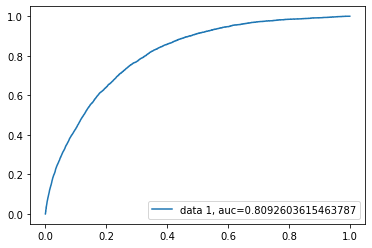

In [25]:
#AUC - ROC Curve
print("AUC - ROC Curve")
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Fitting model with smotetomek_data

In [26]:
smotetomek_train_x = smotetomek_data.drop('CHD/MI', axis=1)
smotetomek_train_y = smotetomek_data["CHD/MI"]

In [27]:
#Traning data
logisticRegr = LogisticRegression(max_iter = 2000)

logisticRegr.fit(smotetomek_train_x, smotetomek_train_y)

LogisticRegression(max_iter=2000)

In [28]:
smotetomek_pred_y = logisticRegr.predict(x_test)

<AxesSubplot:>

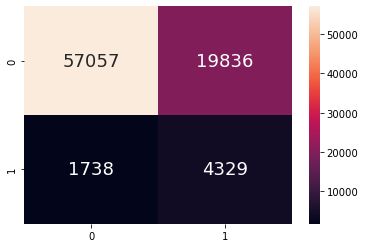

In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, smotetomek_pred_y)
sns.heatmap(cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

In [30]:
#Evaluation
print("Metrics for Predicted data")
tp = cm[1][1] # True Positives : Good (1) predicted Good (1)
fp = cm[0][1] # False Positives : Bad (0) predicted Good (1)
tn = cm[0][0] # True Negatives : Bad (0) predicted Bad (0)
fn = cm[1][0] # False Negatives : Good (1) predicted Bad (0)


print("True Positive Rate: {x}%".format(x=round(100*tp/(tp+fn), 2)))
print("True Negative Rate: {x}%".format(x=round(100*tn/(tn+fp), 2)))
print("False Positive Rate: {x}%".format(x=round(100*fp/(tn+fp), 2)))
print("False Negative Rate: {x}%\n".format(x=round(100*fn/(tp+fn), 2)))

Metrics for Predicted data
True Positive Rate: 71.35%
True Negative Rate: 74.2%
False Positive Rate: 25.8%
False Negative Rate: 28.65%



In [31]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, smotetomek_pred_y)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 73.99469623915141


In [32]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, smotetomek_pred_y))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     76893
         1.0       0.18      0.71      0.29      6067

    accuracy                           0.74     82960
   macro avg       0.57      0.73      0.56     82960
weighted avg       0.91      0.74      0.80     82960



AUC - ROC Curve


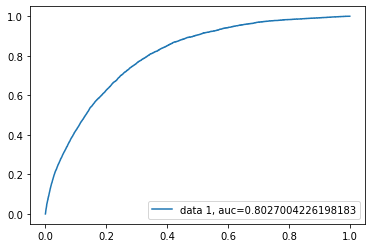

In [33]:
#AUC - ROC Curve
print("AUC - ROC Curve")
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()